In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [147]:
df = pd.read_csv('C:/Users/Elizabeth/Desktop/Gustavo Becerra/TDP/KD.csv')
df.drop('Unnamed: 0', axis= 1, inplace= True) #No needed it
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,1


In [148]:
col_ot = [col for col in df.columns if col != 'classification'] #input features
col_dep = 'classification' #for predictions
df[col_dep].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [149]:
encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df['classification'] = encoder.fit_transform(df['classification'])

In [150]:
x = df[col_ot]
y = df[col_dep]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [151]:
acd = tree.DecisionTreeClassifier()
model = acd.fit(x_train, y_train)
acd_acc = accuracy_score(y_test, acd.predict(x_test))

print (f"Accuracy_score is:" ,acd_acc)

Accuracy_score is: 0.95625


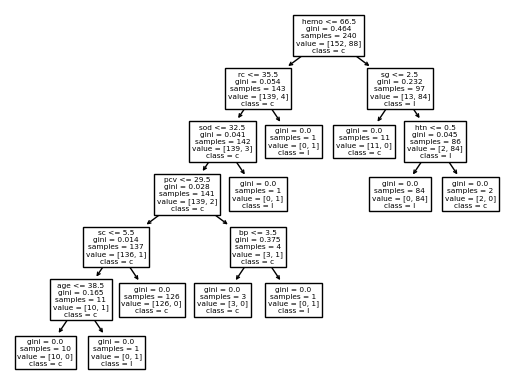

In [152]:
tree= tree.plot_tree(model,
              feature_names=col_ot,
              class_names=col_dep)